## QUIZ: Detect Overfitting and Underfitting with Learning Curves

For this quiz, we'll be using three models to train the circular dataset below.

* A Decision Tree model,
* a Logistic Regression model, and
* a Support Vector Machine model.

<img style="float: left;" src="images/Data.png" width=400>

One of the models **overfits**, one **underfits**, and the other one is **just right**. First, we'll write some code to draw the learning curves for each model, and finally we'll look at the learning curves to decide which model is which.

First, let's remember that the way the curves look for the three models, is as follows:

<img src="images/learning-curves.png" width=700 style="float: left;">

For the first part of the quiz, all you need is to uncomment one of the classifiers, and hit 'Test Run' to see the graph of the Learning Curve. But if you like coding, here are some details. We'll be using the function called **learning_curve**:

> **train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))**
    
No need to worry about all the parameters of this function (you can read some more in here, but here we'll explain the main ones:

* **estimator**, is the actual classifier we're using for the data, e.g., 
* **LogisticRegression()** or **GradientBoostingClassifier()**.
* X and y is our data, split into features and labels.
* **train_sizes** are the sizes of the chunks of data used to draw each point in the curve.
* **train_scores** are the training scores for the algorithm trained on each chunk of data.
* **test_scores** are the testing scores for the algorithm trained on each chunk of data.

Two very important observations:

* The training and testing scores come in as a list of 3 values, and this is because the function uses 3-Fold Cross-Validation.
* **Very important:** As you can see, we defined our curves with Training and Testing **Error**, and this function defines them with Training and Testing Score. These are opposite, so the higher the error, the lower the score. Thus, when you see the curve, you need to flip it upside down in your mind, in order to compare it with the curves above or (use 1-training score, 1- testing_score).

**Part 1: Drawing the learning curves**

In here, we'll be comparing three models:

* A **Logistic Regression** model.
* A **Decision Tree** model.
* A **Support Vector Machine** model with an rbf kernel, and a gamma parameter of 1000 (we'll learn what these mean later).

Uncomment the code for each one, and examine the learning curve that gets drawn. If you're curious about the code used to draw the learning curves, it's on the **utils.py** tab.


In [1]:
# Import, read, and split data
import pandas as pd
data = pd.read_csv('../Datasets/train_tune_data.csv')

data.head()

,x1,x2,y
0,0.336494,-0.985951,-1.0
1,-0.011043,-0.105529,1.0
2,0.238160,-0.617417,1.0
3,-0.366783,-0.713819,1.0
4,1.221923,-1.039399,-1.0


In [2]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Extract Predictors and target data
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
log_reg = LogisticRegression()

### Decision Tree
grad_boost = GradientBoostingClassifier()

### Support Vector Machine
svc = SVC(kernel='rbf', gamma=1000) 

In [3]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])  # permutation: Randomly permute a sequence, or return a permuted range.
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

# Draw Learning Curves from randomized samples
def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(1-train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(1-test_scores_mean, 'o-', color="y",
             label="Cross-validation score")
    
    plt.legend(loc="best")

    plt.show()

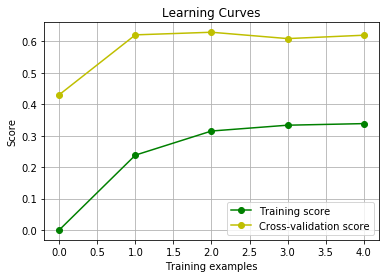

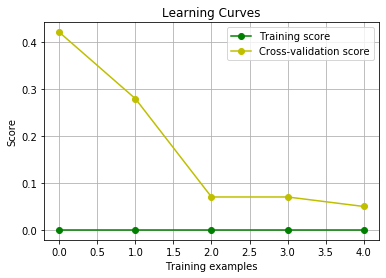

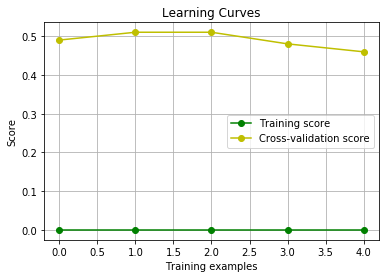

In [4]:
draw_learning_curves(X2, y2, log_reg, 5)
draw_learning_curves(X2, y2, grad_boost, 5)
draw_learning_curves(X2, y2, svc, 5)

**Part 2: Analyzing the learning curves**

For this second part of the quiz, you can look at the curves you've drawn before, to decide which one of the three models underfits, which one overfits, and which one is just right.

**Logistic Regression Model:** Underfits as Training Error keeps increasing and classification Error keeps fluctutating up and down. May be after certain point they converge at a single point.

**Gradient Boost Model:** Fits well as training error is not increasing when we increase the number of data points and the classification error is decreasing which is good. We can say that training and classification curve may converge at some point thus prove to be a godd model.

**SVC Model:** Overfits because as we increase the number of data points, the two curves get closer but never converge to the same point. This means it performs well on training data but perform worst on testing data thus this model does not generalize and is a High Variance Model.